# ============================================================
# HR ATTRITION ANALYSIS – PUBLISHABLE EDA NOTEBOOK
# Author: Sri Nithya
# ============================================================

# --------------------------------------------------------------------------------------
# 01 - Exploratory Data Analysis
Objective:
 Understand current employee turnover rates and demographics

## 1.1 Imports the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2)
plt.rcParams["figure.figsize"] = (18, 5)


## 1.2 Load the dataset and preview

In [3]:
pd.set_option('display.max_columns', 35)
df = pd.read_excel('hr_attrition_raw_dtype.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(f'Number of duplicated data: {df.duplicated().sum()}')

Number of duplicated data: 0


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
ordinal_maps = {
    "JobInvolvement": {
        1: "Low", 2: "Medium", 3: "High", 4: "Very High"
    },
    "WorkLifeBalance": {
        1: "Bad", 2: "Good", 3: "Better", 4: "Best"
    },
    "EnvironmentSatisfaction": {
        1: "Low", 2: "Medium", 3: "High", 4: "Very High"
    },
    "JobSatisfaction": {
        1: "Low", 2: "Medium", 3: "High", 4: "Very High"
    }
}

for col, mapping in ordinal_maps.items():
    df[col] = df[col].map(mapping)


## 1.5 Common Helper Functions

### 1.5.1 Numerical Variable Helper Function

In [8]:
def analyze_numeric_attrition(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")


    sns.violinplot(x="Attrition", y=col, data=df, ax=axes[1])
    axes[1].set_title(f"{col} by Attrition (Violin)")   

    plt.tight_layout()
    plt.show()


### 1.5.2 Categorical Variable Helper Function


In [9]:

def generate_composite_ordinal_plots(df, columns_list):
    
    # Create the figure and a set of subplots (1 row, 4 columns)
    fig, axes = plt.subplots(1, len(columns_list), sharey=True)
    
    # Define color palette consistently
    palette_colors = {'No': '#1f77b4', 'Yes': '#ff7f0e'} 

    for i, col in enumerate(columns_list):
        # --- Prepare data for stacked percentage plot ---
        prop_df = pd.crosstab(df[col], df["Attrition"], normalize="index") * 100
        prop_df = prop_df.reset_index()
        prop_df.columns = [col, 'No', 'Yes']
        plot_df = prop_df.melt(id_vars=col, var_name='Attrition Status', value_name='Percentage (%)')
        plot_df['Attrition Status'] = pd.Categorical(plot_df['Attrition Status'], ["No", "Yes"])

        # --- Seaborn Plotting on the specific axis 'axes[i]' ---
        sns.barplot(
            x=col, 
            y='Percentage (%)', 
            hue='Attrition Status', 
            data=plot_df, 
            palette=palette_colors, 
            dodge=False, # Makes the bars stacked
            ax=axes[i]
        )
        
        # Format Titles and Labels
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_title(f"{col}", fontsize=14, fontweight='bold')
        
        # Tilt X-axis labels for readability
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

        # Hide Y label for all but the first plot (since sharey=True)
        if i == 0:
            axes[i].set_ylabel("Percentage (%)", fontsize=12)
            # Add the legend to the first plot inside the figure boundaries
            axes[i].legend(title='Attrition Status', loc='lower left', bbox_to_anchor=(0.0, 0.35))
        else:
            axes[i].set_ylabel("") # No Y-axis label needed for subsequent plots
            axes[i].get_legend().remove() # Remove redundant legends from other plots

    plt.suptitle('Attrition Rates Across Key Ordinal Satisfaction Variables', y=1.05, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()





## 1.6. Variables Visualization

### 1.6.1 Numerical Variables - Attrition Analysis

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


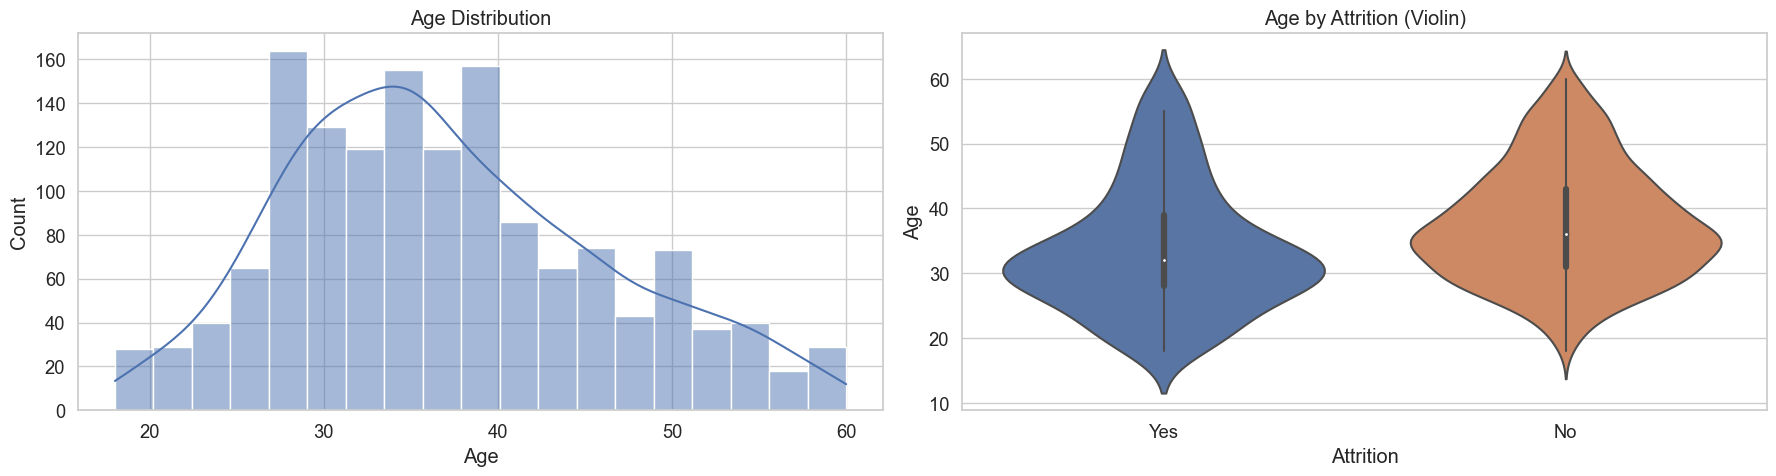

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


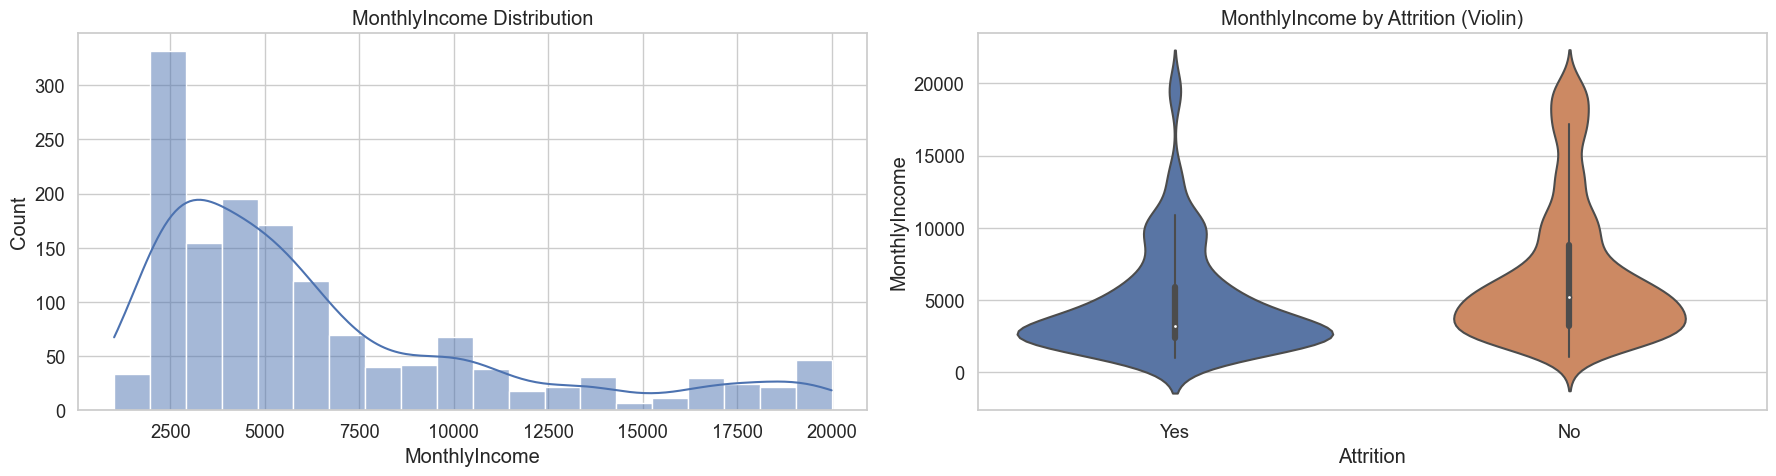

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


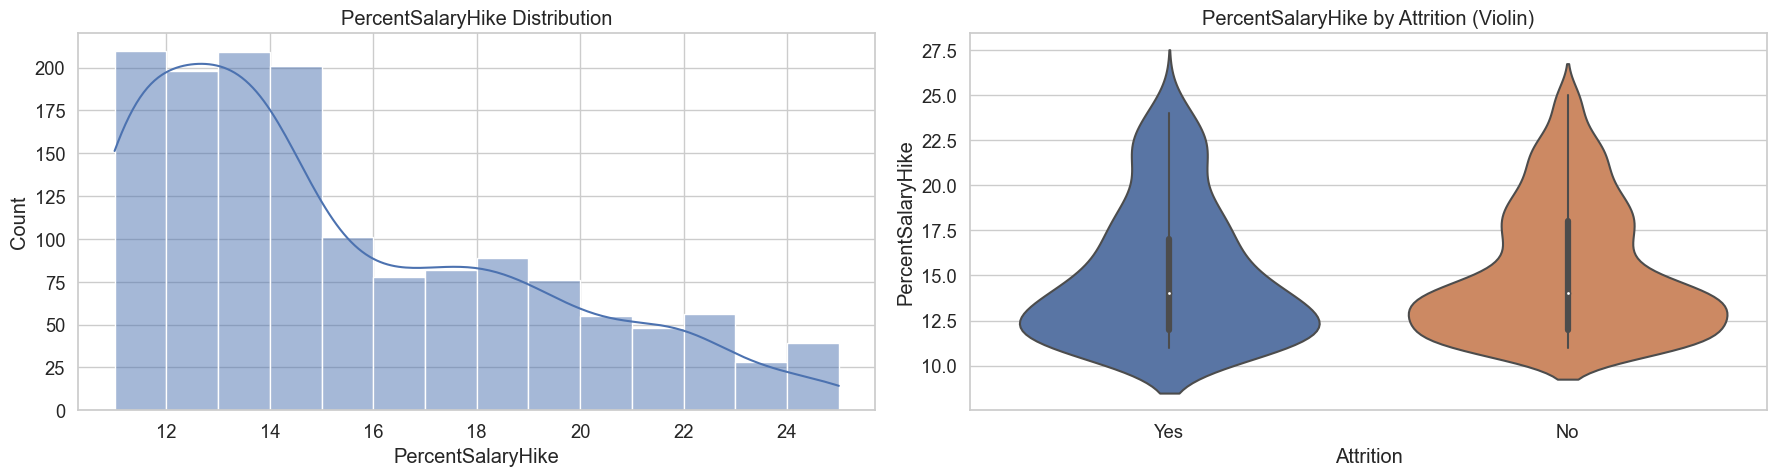

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


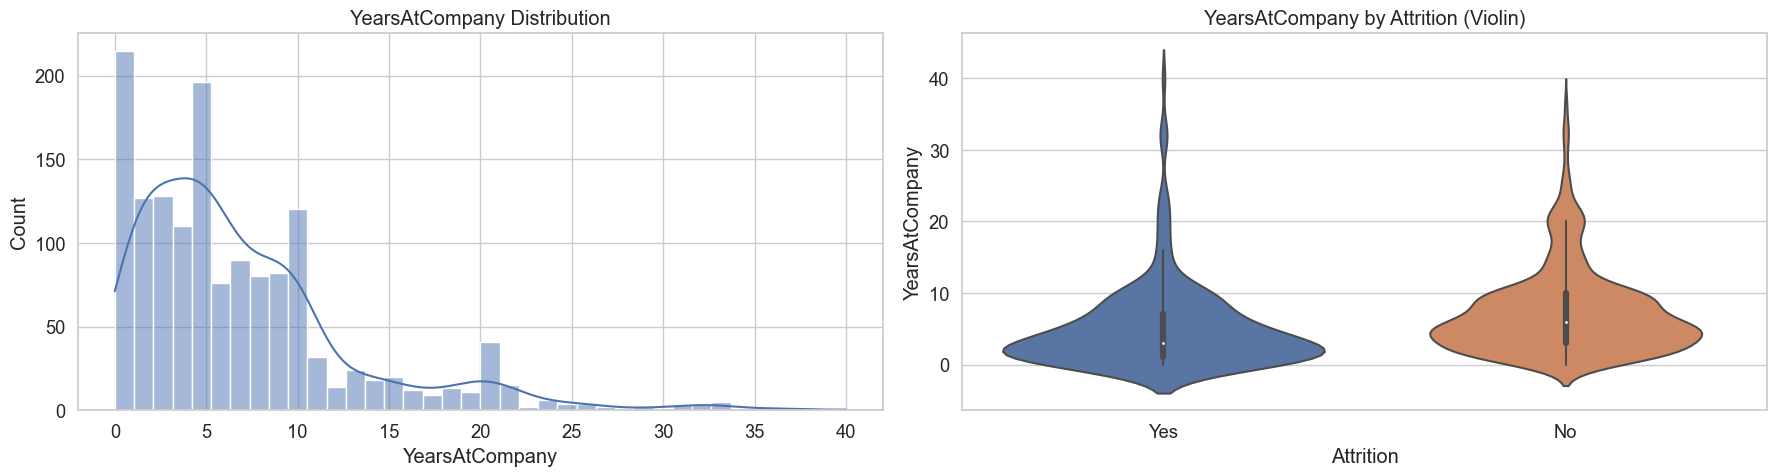

In [10]:
numeric_vars = [
    "Age", "MonthlyIncome", "PercentSalaryHike",
    "YearsAtCompany"
]

for col in numeric_vars:
    analyze_numeric_attrition(df, col)


### Interpretation:

The analyses of Age, Monthly Income, Percent Salary Hike, and Years at Company reveal that **age and tenure** are **crucial factors**, with **younger, newer employees** showing the **highest attrition risk**. Furthermore, **lower monthly income** strongly correlates with **leaving**, while financial incentives like percent **salary hike** are **weak predictors** of retention. Overall, the data suggests that **non-monetary** factors might be stronger drivers for turnover than immediate compensation changes.



### 1.6.2 Categorical Variables Attrition Analysis

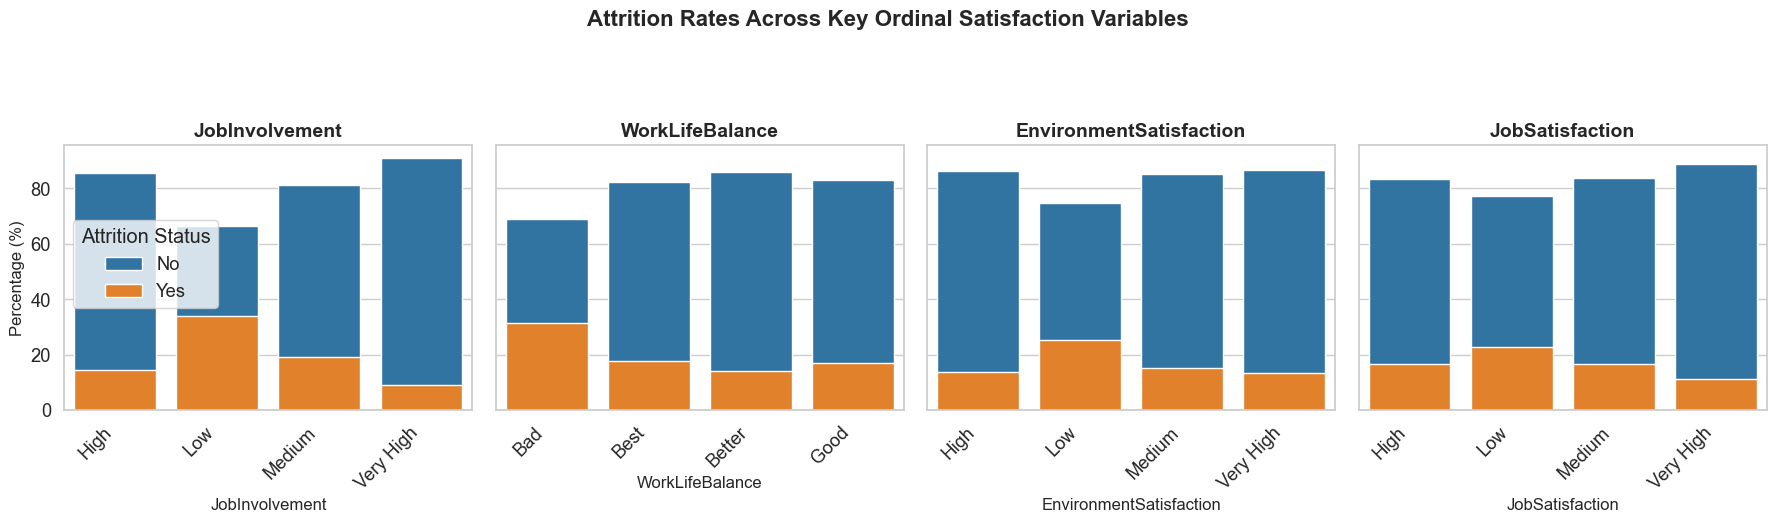

In [11]:
ordinal_vars = [
    "JobInvolvement",
    "WorkLifeBalance",
    "EnvironmentSatisfaction",
    "JobSatisfaction"
]

generate_composite_ordinal_plots(df, ordinal_vars)


### Interpretation

The overall proportion of employees leaving  remains **relatively constant** across varying **levels of job satisfaction, involvement, work-life balance, and environment satisfaction**. This visual consistency suggests these specific ordinal ratings are **weak indicators** of attrition risk when viewed as **percentages of each group**.


## 1.7 The Attrition Story: Satisfaction, Stagnation, and Exit Points

### 1.7.1 Satisfaction Heatmap (Correlation Analysis)

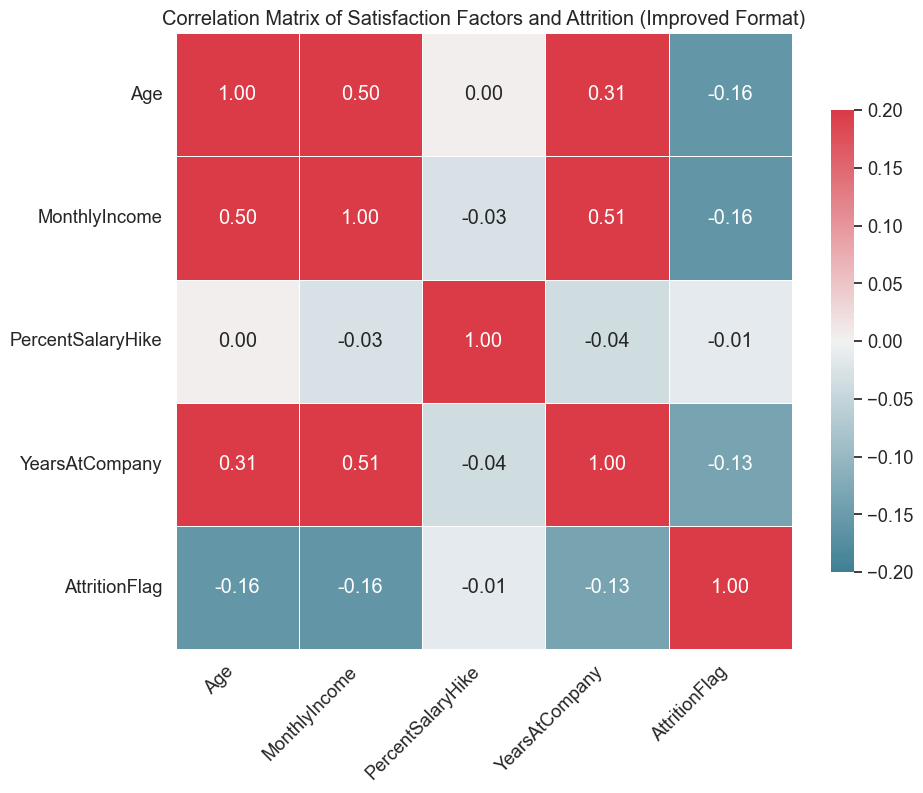

In [12]:
num_df = df[numeric_vars].copy()
num_df['AttritionFlag'] = df['Attrition'].map({'Yes':1,'No':0})
plt.figure(figsize=(10, 8)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(
    num_df.corr(), # Assuming df_corr is your correlation dataframe
    annot=True, 
    fmt=".2f", 
    cmap=cmap, 
    center=0,
    vmin=-0.2, vmax=0.2, # Set limits to balance visualization
    square=True, # Makes cells square
    linewidths=0.5, 
    cbar_kws={"shrink": .75} # Shrinks color bar slightly
)

plt.title('Correlation Matrix of Satisfaction Factors and Attrition (Improved Format)')
plt.xticks(rotation=45, ha='right') # Rotate X-axis labels for readability
plt.yticks(rotation=0)
plt.show()

### Interpretation: 
According to a correlation matrix analysis, **Job Involvement, Environment Satisfaction, and Job Satisfaction** are identified as the **strongest predictors** of employee **attrition**. Lower levels in these areas indicate an increased likelihood of an employee leaving.

### 1.7.2 Career Path Comparison (Leavers vs. Stayers)

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\srinithya\AppData\Local\Temp\ipykernel_29196\4106116620.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])


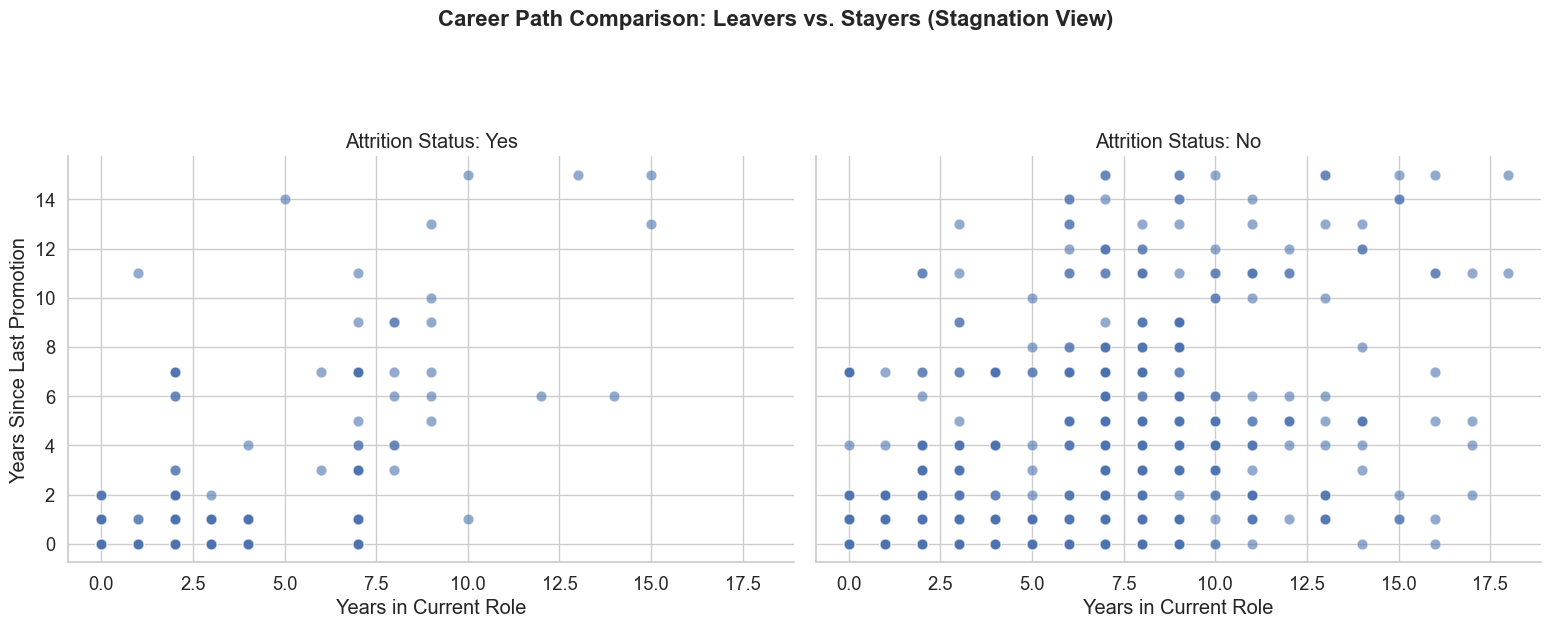

In [13]:

def generate_stagnation_trellis_plot(df):
    
    # Create the FacetGrid: 1 row, 2 columns, divided by 'Attrition' status
    g = sns.FacetGrid(df, col="Attrition", height=6, aspect=1.3, palette='Paired')
    
    # Map a scatter plot to the grid. 'alpha' is used to show density where points overlap
    g.map(sns.scatterplot, "YearsInCurrentRole", "YearsSinceLastPromotion", alpha=0.6, s=60)
    
    # Format titles and labels
    g.fig.suptitle('Career Path Comparison: Leavers vs. Stayers (Stagnation View)', y=1.05, fontsize=16, fontweight='bold')
    g.set_axis_labels("Years in Current Role", "Years Since Last Promotion")
    
    # Update subplot titles to be clearer
    g.set_titles(col_template="Attrition Status: {col_name}")
    
    g.add_legend()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


generate_stagnation_trellis_plot(df)


### Interpretation:

The "Yes" attrition group contains a higher concentration of individuals who accumulated substantial time within the same role  without significant vertical movement. This pattern strongly suggests that a lack of upward mobility or a long tenure in a non-advancing position is a primary trigger for employees to seek opportunities elsewhere.

### 1.7.3 High-Risk Roles & Policies - Exit point

### 1.7.3.1 Department-Job Role Hierarchial Analysis on Attrition

In [ ]:
#%pip install --quiet kaleido
import plotly.express as px

# Define color mapping for Attrition
attrition_colors = {'No': '#1f77b4', 'Yes': '#ff7f0e'}

fig = px.sunburst(
    df, 
    path=['Department', 'JobRole', 'Attrition'], 
    color='Attrition',
    color_discrete_map=attrition_colors, # Use the existing color mapping
    title='Hierarchical Attrition Breakdown by Department and Job Role'
)

# Update traces to show label AND percentage in the visualization
fig.update_traces(textinfo="label+percent parent") 

# Make sure the plot is interactive and renders nicely in your notebook
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25)) # Optional: adjusts margins

# Save the figure as a static PNG file (requires kaleido)
fig.write_image("attrition_sunburst_chart.png") 

fig.show()


NameError: name 'attrition_colors' is not defined

### Interpretation:

The clear dominance of green segments confirms that the majority of the workforce in most roles chooses to stay with the company, but **attrition hotspots** exist in specific **high-volume roles** within **Sales and R&D**.
The Sales Executive (27% attrition) and Laboratory Technician (24% attrition) roles have the highest specific turnover rates.


### 1.7.3.2 Policy Factors on Attrition

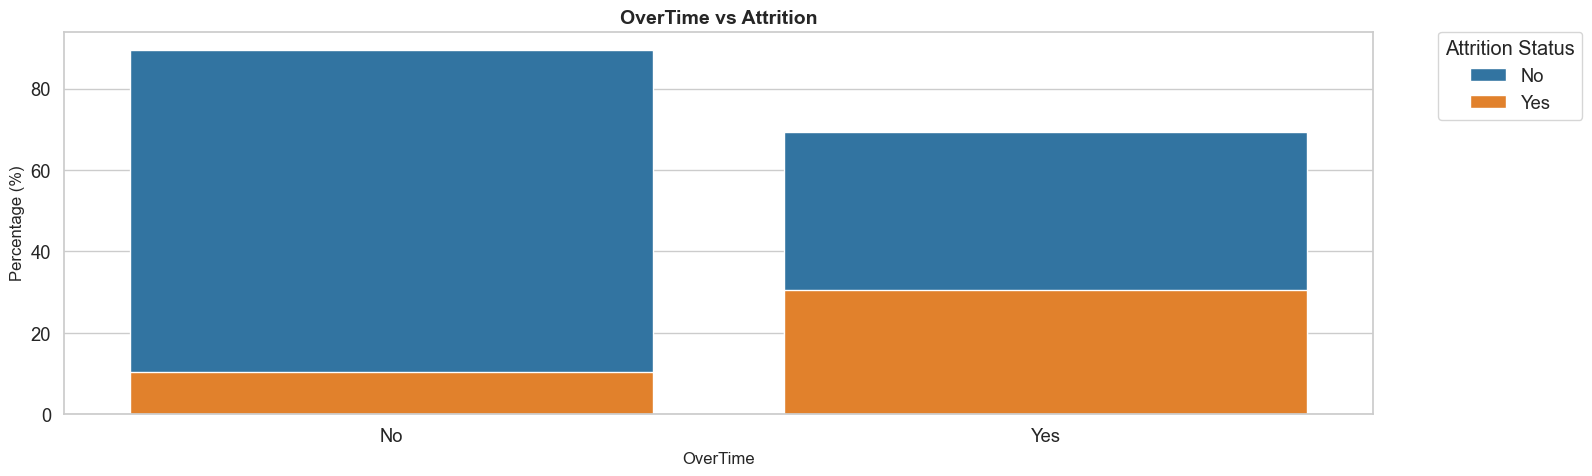

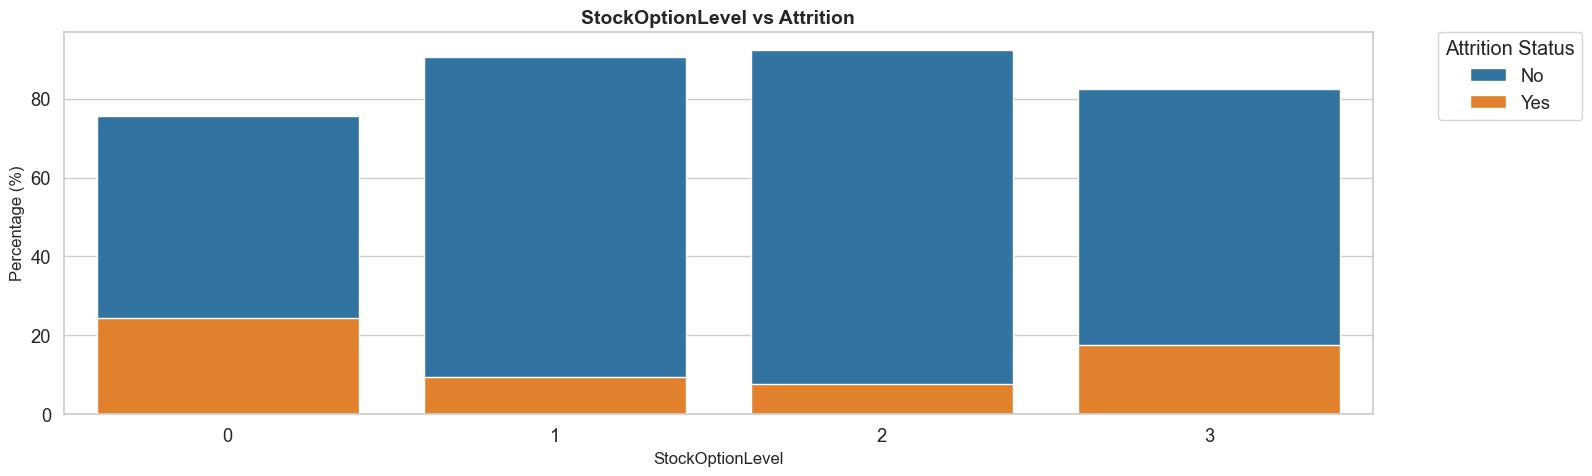

In [17]:

def analyze_categorical_attrition_standard(df, col):
    
    # --- Prepare data for stacked percentage plot ---
    prop_df = pd.crosstab(df[col], df["Attrition"], normalize="index") * 100
    prop_df = prop_df.reset_index()
    prop_df.columns = [col, 'No', 'Yes']
    plot_df = prop_df.melt(id_vars=col, var_name='Attrition Status', value_name='Percentage (%)')
    plot_df['Attrition Status'] = pd.Categorical(plot_df['Attrition Status'], ["No", "Yes"])
    
    # --- Seaborn Plotting with Standard Formatting ---
    fig, ax = plt.subplots(1, 1) 

    sns.barplot(
        x=col, 
        y='Percentage (%)', 
        hue='Attrition Status', 
        data=plot_df, 
        palette={'No': '#1f77b4', 'Yes': '#ff7f0e'}, # Blue for No, Orange for Yes
        dodge=False, # Makes the bars stacked
        ax=ax
    )
    
    # Format Titles and Labels
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.set_title(f"{col} vs Attrition", fontsize=14, fontweight='bold')
    
    # Tilt X-axis labels to 45 degrees for readability, adjust if labels are short
    plt.xticks(rotation=0, ha='center') # Keep rotation at 0 for short labels
    
    # Adjust Legend: Place it outside the plot area in the top right corner
    ax.legend(title='Attrition Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust subplot area to make physical room for external legend
    plt.show()

# --- Usage Example (Assuming 'df' has been loaded): ---

# Analyze Overtime
analyze_categorical_attrition_standard(df, 'OverTime')

# Analyze Stock Option Level (Note: This is ordinal/numeric but works as a category here)
analyze_categorical_attrition_standard(df, 'StockOptionLevel')


### Interpretation:

**Company policies** are a **major driver** of turnover, as employees working overtime show significantly higher attrition risk, suggesting burnout. Conversely, providing stock option incentives effectively aligns long-term goals and substantially lowers the likelihood of employees leaving.



In [18]:
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Overall Attrition Rate (%):")
print(attrition_rate)

Overall Attrition Rate (%):
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


## 1.8 Key Insights 

- Attrition is highest among employees with:
  - Low job involvement
  - Poor work-life balance
  - Lower income bands
  - Longer time since last promotion

- Organizational hotspots are visible within specific job roles
  nested under certain departments.

- Attrition decreases noticeably after income and tenure thresholds,
  indicating retention stabilization.


## 1.9 Final Summary
Attrition is driven less by average salary changes and performance ratings, and more by a combination of low satisfaction, career path stagnation, mandatory overtime, and a lack of ownership incentives.

# --------------------------------------------------------------------------------------
# 02 - Machine Learning Pipeline – End‑to‑End Attrition Modeling
This section converts EDA insights into a **production‑ready ML workflow**. The goal is **interpretability first, performance second**, aligned with HR decision‑making.

## 2.1 Problem Framing


- **Target variable**: `Attrition` (Binary: Yes / No)
- **Business objective**:
- Identify employees at **high risk of leaving**
- Understand **why** (drivers, not just predictions)


This is a **binary classification** problem with **class imbalance (~16% attrition)**.

## 2.2 Feature Selection (EDA‑Driven)

In [20]:
### Selected Numerical Features
num_features = [
"Age",
"MonthlyIncome",
"PercentSalaryHike",
"TotalWorkingYears",
"YearsAtCompany",
"YearsInCurrentRole",
"YearsSinceLastPromotion",
"YearsWithCurrManager"
]

### Selected Ordinal Features
ordinal_features = [
"JobInvolvement",
"WorkLifeBalance",
"EnvironmentSatisfaction",
"JobSatisfaction",
"RelationshipSatisfaction"
]


### Selected Nominal Features
nominal_features = [
"Department",
"JobRole",
"EducationField",
"BusinessTravel",
"Gender",
"MaritalStatus",
"OverTime"
]

## 2.3 Encoding Strategy

Ordinal variables are **manually encoded** to preserve semantic meaning.

In [21]:
ordinal_encoding = {
	"JobInvolvement": {"Low":1, "Medium":2, "High":3, "Very High":4},
	"WorkLifeBalance": {"Bad":1, "Good":2, "Better":3, "Best":4},
	"EnvironmentSatisfaction": {"Low":1, "Medium":2, "High":3, "Very High":4},
	"JobSatisfaction": {"Low":1, "Medium":2, "High":3, "Very High":4},
	"RelationshipSatisfaction": {"Low":1, "Medium":2, "High":3, "Very High":4}
}

for col, mapping in ordinal_encoding.items():
	df[col] = df[col].map(mapping)

## 2.4 Train‑Test Split

In [22]:
from sklearn.model_selection import train_test_split


X = df[num_features + ordinal_features + nominal_features]
y = df["Attrition"].map({"No":0, "Yes":1})


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42, stratify=y
)

## 2.5 Preprocessing Pipeline

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


preprocessor = ColumnTransformer(
transformers=[
("num", StandardScaler(), num_features),
("cat", OneHotEncoder(handle_unknown="ignore"), nominal_features)
],
remainder="passthrough"
)

## 2.6 Baseline Model – Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Update the preprocessor to impute missing values for ordinal features
from sklearn.compose import make_column_transformer

ordinal_imputer = Pipeline([
	("imputer", SimpleImputer(strategy="constant", fill_value=1))
])

# Rebuild the preprocessor with imputation for ordinal features
preprocessor_with_impute = ColumnTransformer(
	transformers=[
		("num", StandardScaler(), num_features),
		("ord", ordinal_imputer, ordinal_features),
		("cat", OneHotEncoder(handle_unknown="ignore"), nominal_features)
	],
	remainder="drop"
)

log_model = Pipeline([
	("preprocess", preprocessor_with_impute),
	("model", LogisticRegression(class_weight="balanced", max_iter=1000))
])

log_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'MonthlyIncome',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant'))]),
                                                  ['JobInvolvement',
                                                   'WorkLifeBalance',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'RelationshipSatisfaction']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Department', 'JobRole',
                                                   'EducationField',
                                                   'BusinessTravel', 'Gender',
                                                   'MaritalStatus',
                                                   'OverTime'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

## 2.7 Evaluation

In [26]:
from sklearn.metrics import classification_report, roc_auc_score


y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]


print(classification_report(y_test, y_pred))
print("ROC‑AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       309
           1       0.43      0.71      0.54        59

    accuracy                           0.80       368
   macro avg       0.68      0.77      0.70       368
weighted avg       0.86      0.80      0.82       368

ROC‑AUC: 0.8129011025176897


## 2.8 Odds Ratio Interpretation

In [27]:
feature_names = log_model.named_steps["preprocess"].get_feature_names_out()
coefficients = log_model.named_steps["model"].coef_[0]


odds_ratios = pd.DataFrame({
"Feature": feature_names,
"OddsRatio": np.exp(coefficients)
}).sort_values(by="OddsRatio", ascending=False)


odds_ratios.head(15)


,Feature,OddsRatio
18,cat__JobRole_Laboratory Technician,2.688110
25,cat__EducationField_Human Resources,2.513937
32,cat__BusinessTravel_Travel_Frequently,2.234134
40,cat__OverTime_Yes,2.203425
24,cat__JobRole_Sales Representative,2.164951
38,cat__MaritalStatus_Single,1.993369
6,num__YearsSinceLastPromotion,1.682837
17,cat__JobRole_Human Resources,1.573770
15,cat__Department_Sales,1.363086
23,cat__JobRole_Sales Executive,1.335083


## 2.9 Advanced Model – XGBoost

In [31]:
from xgboost import XGBClassifier


xgb_model = Pipeline([
    ("preprocess", preprocessor_with_impute),
    ("model", XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
    ))
])



xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'MonthlyIncome',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant'))]),
                                                  ['JobInvolvement',
                                                   'WorkLife...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

## 2.10 SHAP Explainability

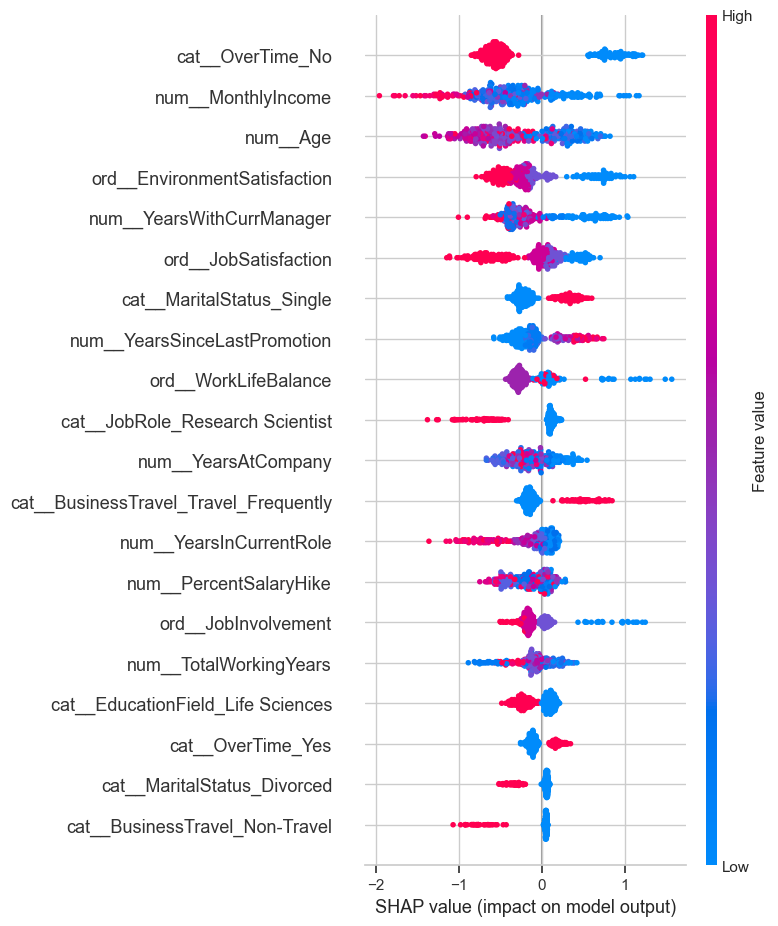

In [32]:
import shap

# Get feature names after transformation
feature_names = xgb_model.named_steps["preprocess"].get_feature_names_out()

explainer = shap.TreeExplainer(xgb_model.named_steps["model"])
X_transformed = xgb_model.named_steps["preprocess"].transform(X_test)
shap_values = explainer(X_transformed)

# Pass the transformed data and feature names to summary_plot
shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names)

### Interpretation: 
Attrition is driven primarily by work strain (overtime, travel), career stagnation, and low engagement, with compensation acting as a stabilizing threshold rather than a primary trigger.

## Final Veredict
This project demonstrates a complete HR analytics lifecycle:
**EDA → Explainable ML → Actionable insights** 

**Actionable Insights**:
- Focus retention efforts on employees with low involvement and long promotion gaps
- Use compensation as a stabilizer, not sole lever
- Deploy model outputs as early‑warning signals, not termination predictors
